## 各位同学好，这次作业我们来实践利用python的数据可视化

今天咱们要用到的数据还是NYSE的数据，没有数据的同学可以找班主任要哈，他那边有百度网盘~

这里展示的图片大家需要满足以下要求，每一个组图片按照以下要求给分：
1. 内容正确40%
2. 图标题、坐标轴标题清晰明了20%
3. 颜色选取清晰20% 
    > 注：对于有着不同意义的数据点要用**不同类型的点**做图例标注，避免歧义 `ax.set_prop_circle`, `sns.hls_palette`
4. 图片中信息分布合理20% 
    > 注：对于过分集中的数据采用对数坐标 `plt.gca().set_xscale`

## 图1：用饼图表示NYSE数据中2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成（30 分）

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [66]:
fund= pd.read_csv("fundamentals.csv")
secu = pd.read_csv("securities.csv")
fund_select= fund[['Period Ending','Net Income','Ticker Symbol']]
secu_select= secu[['Ticker symbol','GICS Sector']]
fund_select.head()

,Period Ending,Net Income,Ticker Symbol
0,2012-12-31,-1.876000e+09,AAL
1,2013-12-31,-1.834000e+09,AAL
2,2014-12-31,2.882000e+09,AAL
3,2015-12-31,7.610000e+09,AAL
4,2012-12-29,3.876700e+08,AAP


In [67]:
fund_select_2015 = fund_select[fund_select['Period Ending']>'2015']
fund_select_2015.head(n=20)

,Period Ending,Net Income,Ticker Symbol
3,2015-12-31,7.610000e+09,AAL
6,2015-01-03,4.938250e+08,AAP
7,2016-01-02,4.733980e+08,AAP
10,2015-09-26,5.339400e+10,AAPL
11,2016-09-24,4.568700e+10,AAPL
15,2015-12-31,5.144000e+09,ABBV
18,2015-09-30,-1.381650e+08,ABC
19,2016-09-30,1.427929e+09,ABC
23,2015-12-31,4.423000e+09,ABT
26,2015-11-27,6.295510e+08,ADBE


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [68]:
df_merged = pd.merge(fund_select_2015,secu_select,left_on='Ticker Symbol',right_on='Ticker symbol')
df_merged.head()
df_sorted = df_merged.sort_values('Net Income', ascending=False,)
df_sorted.head(n=100)

,Period Ending,Net Income,Ticker Symbol,Ticker symbol,GICS Sector
3,2015-09-26,5.339400e+10,AAPL,AAPL,Information Technology
4,2016-09-24,4.568700e+10,AAPL,AAPL,Information Technology
332,2015-12-31,2.444200e+10,JPM,JPM,Financials
634,2015-12-31,2.289400e+10,WFC,WFC,Financials
256,2015-12-31,1.810800e+10,GILD,GILD,Health Care
629,2015-12-31,1.787900e+10,VZ,VZ,Telecommunications Services
91,2015-12-31,1.724200e+10,C,C,Financials
416,2016-06-30,1.679800e+10,MSFT,MSFT,Information Technology
643,2015-01-31,1.636300e+10,WMT,WMT,Consumer Staples
656,2015-12-31,1.615000e+10,XOM,XOM,Energy


In [69]:
sec_100 = df_sorted[0:100]['GICS Sector']

In [70]:
from collections import Counter
sec_name =[]
sec_num = []
sec_count = Counter(sec_100.values.tolist())
for each in sec_count.items():
    (name,num)=each
    sec_name.append(name)
    sec_num.append(num)

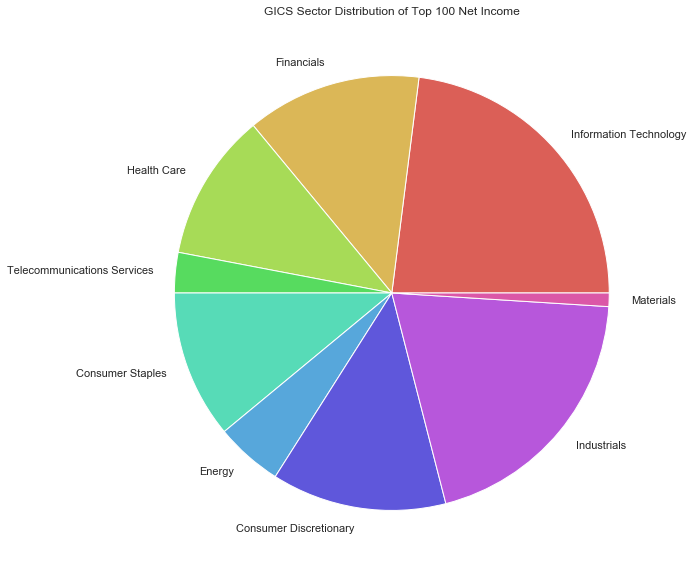

In [85]:
_,ax = plt.subplots(figsize=(10,10))
ax.set_prop_cycle(color=sns.hls_palette(len(sec_name)))
plt.pie(sec_num,labels=sec_name)
ax.set_title('GICS Sector Distribution of Top 100 Net Income')
plt.show()

## 图2：在一张直方图中表示不同行业（GICS Sector）的营收（total revenue）分布（30 分）

In [80]:
fund.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [81]:
secu.columns

Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters', 'Date first added',
       'CIK'],
      dtype='object')

In [101]:
df_fund = fund[['Ticker Symbol','Total Revenue']]
df_secu = secu[['Ticker symbol','GICS Sector']]
df = pd.merge(df_fund,df_secu,left_on='Ticker Symbol',right_on='Ticker symbol')
sec_name =df['GICS Sector'].unique()
total_max_lg = np.ceil(np.log10(df['Total Revenue'].max()))
total_min_lg = np.ceil(np.log10(df['Total Revenue'].min()))
print(total_max_lg)
print(total_min_lg)

12.0
7.0


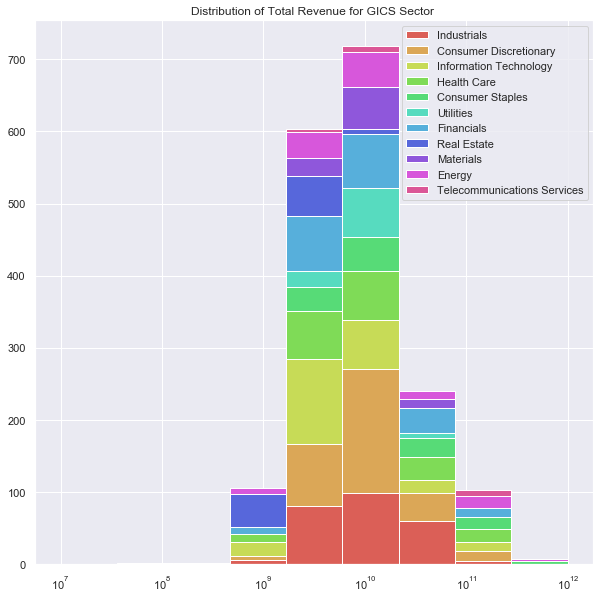

In [104]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_prop_cycle(color=sns.hls_palette(len(sec_name)))
ax.set_xscale('log')
plt.hist([df[df['GICS Sector']==name]['Total Revenue'] for name in sec_name],
         bins = np.logspace(total_min_lg,total_max_lg,10),
         density = False,
         stacked=True)
ax.set_title('Distribution of Total Revenue for GICS Sector ')
plt.legend(sec_name)
plt.show()

## 图3：在一张二维散点图中表示不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income）和营收(Total Revenue)的比例 （40 分）

In [115]:
fund['Asset Ratio'] = fund.apply(lambda x: x['Fixed Assets'] / x['Total Assets'], axis=1)
fund['Income Ratio'] = fund.apply(lambda x: x['Net Income'] / x['Total Revenue'], axis=1)
fund.head()
df_fund = fund[['Ticker Symbol','Asset Ratio','Income Ratio']]
df_secu = secu[['Ticker symbol','GICS Sector']]
df = pd.merge(df_fund,df_secu,left_on='Ticker Symbol',right_on='Ticker symbol')
sec_name =df['GICS Sector'].unique().tolist()
df.head()
sec_name

['Industrials',
 'Consumer Discretionary',
 'Information Technology',
 'Health Care',
 'Consumer Staples',
 'Utilities',
 'Financials',
 'Real Estate',
 'Materials',
 'Energy',
 'Telecommunications Services']

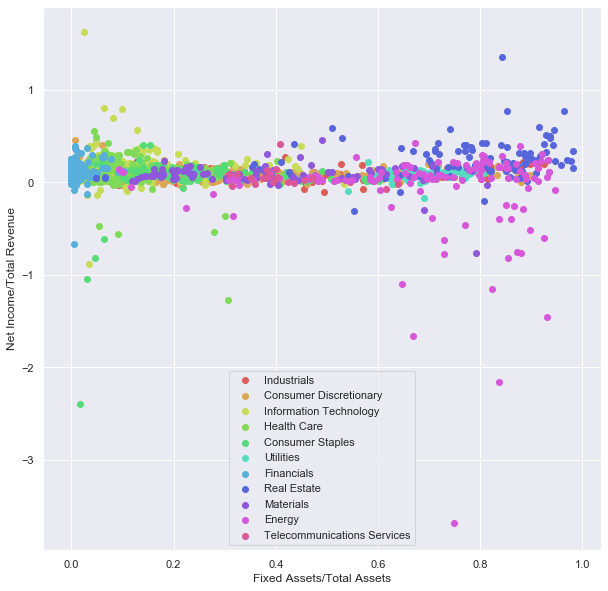

In [117]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_prop_cycle(color=sns.hls_palette(len(sec_name)))
for name in sec_name:
    ax.scatter(df[df['GICS Sector']==name]['Asset Ratio'],df[df['GICS Sector']==name]['Income Ratio'])
plt.xlabel('{}/{}'.format('Fixed Assets','Total Assets'))
plt.ylabel('{}/{}'.format('Net Income','Total Revenue'))
plt.legend(sec_name)
plt.show()